# Blatt 3

## Aufgabe 3 Maxwell-Boltzmann-Verteilung
Wir wollen die Verteilung am Beispiel von Helium-Atomen (m = 6.65 · 10−27 kg) bei der Temperatur
300 K untersuchen. Die Boltzmann-Konstante ist k = 1.38 · 10−23 J/K.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Zeichne die Verteilung und finde dessen Maximum vmax.

v_max =  786.5731462925852


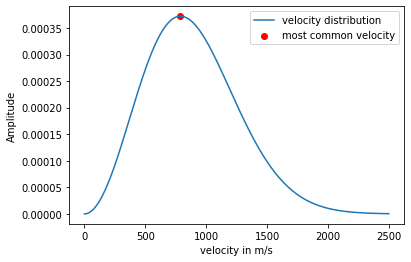

In [2]:
mass = 6.65e-27
T = 300
k = 1.38e-23
v = np.linspace(0, 2500, 500)
def f(x):
    return (mass/(2 *np.pi*k*T))**1.5* 4 * np.pi * x**2  * np.exp(-mass * x**2 / (k * T))


plt.plot(v, f(v),label="velocity distribution")
plt.xlabel('velocity in m/s')
plt.ylabel('Amplitude')

v_max = v[np.argmax(f(v))]
print('v_max = ', v_max)
plt.scatter(v_max, f(v_max), color='red', label='most common velocity')
plt.legend()

plt.show()

### Berechne dem Mittelwert hvi und das mittlere Geschwindigkeitsquadrat durch Numerische Integration (z.B. scipy.integrate.quad()).

In [3]:
norm = quad(f, 0, np.inf)[0]
print ('norm = ', norm)

v_mw = quad(lambda x: x * f(x), 0, np.inf)[0]/ norm 
print('<v> = ', v_mw)

v_rms = quad(lambda x: x**2 * f(x), 0, np.inf)[0]/ norm
print('v_rms = ', v_rms)

sigma = (v_rms - v_mw**2)**0.5
print('standardabw = ', sigma)

norm =  0.35355339059327356
<v> =  890.3164694759312
v_rms =  933834.5864661663
standardabw =  375.72752181079255


### Zeichne hvi, vRMS und die Standardabweichung in die Verteilung ein

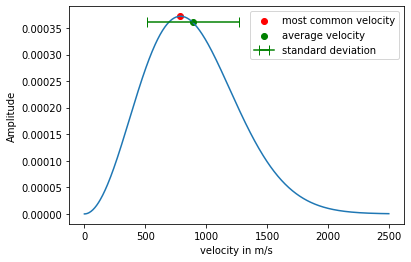

In [4]:
plt.plot(v, f(v))
plt.scatter(v_max, f(v_max), color='red',label='most common velocity')
plt.scatter(v_mw, f(v_mw), color='green',label='average velocity')
plt.errorbar(v_mw,f(v_mw), xerr=sigma, color='green', capsize=5,label='standard deviation')


plt.xlabel('velocity in m/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### (optional) Bestimme den Median vm der Verteilung
Wo liegt er im Vergleich zu vmax und hvi?

v_m =  856.7134268537075


Text(0, 0.5, 'Amplitude')

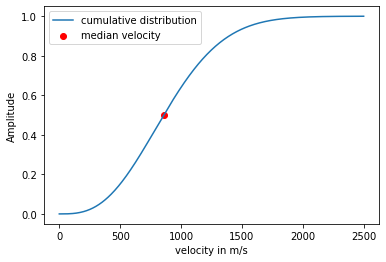

In [5]:
def g(v_m):
    return quad(f, 0, v_m)[0]/norm
# suche v_m, sodass g(v_m) = 0.5
g_v = np.array([g(v_n) for v_n in v])
plt.plot(v, g_v, label='cumulative distribution')

v_m = v[np.argmin(np.abs(g_v - 0.5))]
print('v_m = ', v_m)

plt.scatter(v_m, g(v_m), color='red', label='median velocity')
plt.legend()

plt.xlabel('velocity in m/s')
plt.ylabel('Amplitude')

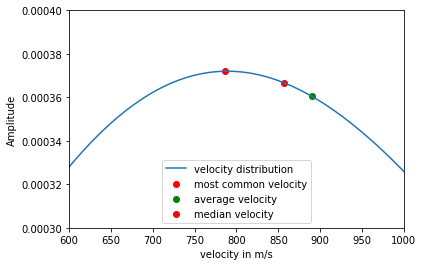

In [6]:
plt.plot(v, f(v),label="velocity distribution")
plt.scatter(v_max, f(v_max), color='red',label='most common velocity')
plt.scatter(v_mw, f(v_mw), color='green',label='average velocity')
plt.scatter(v_m, f(v_m), color='red',label='median velocity')

plt.xlabel('velocity in m/s')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(600, 1000)
plt.ylim(.0003, .0004)

plt.show()